In [1]:
import pandas as pd
import numpy as np
import os 
import sqlite3
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import datetime

In [2]:
# Set the colour palette to coour-blind friendly
sns.reset_orig()
my_palette = sns.color_palette("colorblind")
plt.style.use('seaborn-colorblind')

In [3]:
# Get current working directory
print(os.getcwd())

C:\Users\geral\Repository\Coursework


In [4]:
# Set working directory
os.chdir(r'C:\Users\geral\Repository\Coursework\Dataset')

print(os.getcwd())

C:\Users\geral\Repository\Coursework\Dataset


## Connecting to database

In [5]:
conn = sqlite3.connect('pydatabase.db')

In [6]:
c = conn.cursor()

# Q3

### Approach

My approach to this question is fairly lengthly. There are 3 parts to my solution. We start off by looking at the overall dataset, we try to look for patterns as a whole and by the states. 

In the second part, we proceed to look at states that display negative growth, and we end off by looking at states with postitive growth.

### Setup

Upon setting up, we can skip this chunk of code and execute the codes from part 1. The purpose of the setting up codes is to create a filtered table on the data base for easier extraction.

In [7]:
summ = pd.read_sql_query('''
SELECT Year, Month, DayofMonth, DayofWeek, ArrTime, DepTime, Origin, Dest, airports.iata, 
airports.airport, airports.city, airports.state, airports.country

FROM Y05_06 JOIN airports ON Y05_06.Dest = airports.iata
WHERE Cancelled = 0 AND Diverted = 0 AND ArrTime <= 2359 AND DepTime <= 2359
''',conn)
summ

,Year,Month,DayofMonth,DayOfWeek,ArrTime,DepTime,Origin,Dest,iata,airport,city,state,country
0,2005,1,28,5,1741.0,1603.0,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA
1,2005,1,29,6,1736.0,1559.0,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA
2,2005,1,30,7,1741.0,1603.0,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA
3,2005,1,31,1,1726.0,1556.0,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA
4,2005,1,2,7,2235.0,1934.0,ORD,BOS,BOS,Gen Edw L Logan Intl,Boston,MA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979508,2006,12,29,5,1452.0,1246.0,ATL,EWR,EWR,Newark Intl,Newark,NJ,USA
13979509,2006,12,29,5,2033.0,1225.0,SEA,ATL,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA
13979510,2006,12,29,5,2254.0,2118.0,ATL,MCO,MCO,Orlando International,Orlando,FL,USA
13979511,2006,12,29,5,2209.0,2122.0,SLC,SJC,SJC,San Jose International,San Jose,CA,USA


In [8]:
summ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979513 entries, 0 to 13979512
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Year        int64  
 1   Month       int64  
 2   DayofMonth  int64  
 3   DayOfWeek   int64  
 4   ArrTime     float64
 5   DepTime     float64
 6   Origin      object 
 7   Dest        object 
 8   iata        object 
 9   airport     object 
 10  city        object 
 11  state       object 
 12  country     object 
dtypes: float64(2), int64(4), object(7)
memory usage: 1.4+ GB


In [9]:
summ.isnull().sum()

Year             0
Month            0
DayofMonth       0
DayOfWeek        0
ArrTime          0
DepTime          0
Origin           0
Dest             0
iata             0
airport          0
city          8773
state         8773
country          0
dtype: int64

In [10]:
summ_narm = summ.dropna()

summ_narm

,Year,Month,DayofMonth,DayOfWeek,ArrTime,DepTime,Origin,Dest,iata,airport,city,state,country
0,2005,1,28,5,1741.0,1603.0,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA
1,2005,1,29,6,1736.0,1559.0,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA
2,2005,1,30,7,1741.0,1603.0,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA
3,2005,1,31,1,1726.0,1556.0,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA
4,2005,1,2,7,2235.0,1934.0,ORD,BOS,BOS,Gen Edw L Logan Intl,Boston,MA,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13979508,2006,12,29,5,1452.0,1246.0,ATL,EWR,EWR,Newark Intl,Newark,NJ,USA
13979509,2006,12,29,5,2033.0,1225.0,SEA,ATL,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA
13979510,2006,12,29,5,2254.0,2118.0,ATL,MCO,MCO,Orlando International,Orlando,FL,USA
13979511,2006,12,29,5,2209.0,2122.0,SLC,SJC,SJC,San Jose International,San Jose,CA,USA


In [11]:
summ_narm.info()

# observations : 13,987,862 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13970740 entries, 0 to 13979512
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Year        int64  
 1   Month       int64  
 2   DayofMonth  int64  
 3   DayOfWeek   int64  
 4   ArrTime     float64
 5   DepTime     float64
 6   Origin      object 
 7   Dest        object 
 8   iata        object 
 9   airport     object 
 10  city        object 
 11  state       object 
 12  country     object 
dtypes: float64(2), int64(4), object(7)
memory usage: 1.5+ GB


Created a new table on the database

In [12]:
c.execute('''DROP TABLE q3_summ_narm''')

summ_narm.to_sql('q3_summ_narm', con = conn , index = False)

In [13]:
# to free up memory
del summ, summ_narm

## Part 1 : Summary of Destination

In [16]:
summ_narm = pd.read_sql_query('''
                                SELECT Year, Month, DayofMonth,DayOfWeek,Origin,Dest,iata,airport,city,state,country 
                                FROM q3_summ_narm''', conn)
summ_narm

# observations : 13,987,862 

,Year,Month,DayofMonth,DayOfWeek,Origin,Dest,iata,airport,city,state,country
0,2005,1,28,5,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA
1,2005,1,29,6,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA
2,2005,1,30,7,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA
3,2005,1,31,1,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA
4,2005,1,2,7,ORD,BOS,BOS,Gen Edw L Logan Intl,Boston,MA,USA
...,...,...,...,...,...,...,...,...,...,...,...
13970735,2006,12,29,5,ATL,EWR,EWR,Newark Intl,Newark,NJ,USA
13970736,2006,12,29,5,SEA,ATL,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA
13970737,2006,12,29,5,ATL,MCO,MCO,Orlando International,Orlando,FL,USA
13970738,2006,12,29,5,SLC,SJC,SJC,San Jose International,San Jose,CA,USA


We want to find the total flight in each state in each year.

In [17]:
summ_state_byyear = summ_narm.copy()
summ_state_byyear = summ_state_byyear[['state','Year']].sort_values(by = 'state')

count_byyear = summ_state_byyear.groupby(by = ['Year','state']).size().reset_index(name = 'counts')
count_byyear

del summ_state_byyear

In [18]:
count_byyear

,Year,state,counts
0,2005,AK,41724
1,2005,AL,42379
2,2005,AR,35755
3,2005,AZ,193224
4,2005,CA,814426
...,...,...,...
98,2006,VT,6680
99,2006,WA,122906
100,2006,WI,49720
101,2006,WV,4850


### TESTINGS
========================================================================================================================
The above code didn't work initially, I used a smaller dataset to test the code first.

In [19]:
# test = summ_state_byyear[['Year', 'state']]
# test

In [20]:
# test.state.unique()

In [21]:
# test.info()

In [22]:
# test_WVVIDE = test[test['state'].isin(['WV','VI','DE'])]
# test_CAILMA = test[(test['state'] == 'CA') & (test['state'] == 'IL') & (test['state'] == 'MA')]
# test_WVVIDE

In [23]:
# test_count = test_WVVIDE.groupby(by = ['Year', 'state']).size().reset_index(name = 'counts')
# test_count

# try df.groupby(['col1', 'col2']).size().reset_index(name='counts')

In [24]:
# del test, test_CAILMA, test_count, test_WVVIDE

========================================================================================================================
### End of TESTINGS

The total flight in each state

We arrange the number of flights in descending order. 
The table is saved and used in the report.

In [25]:
summ_state_total = summ_narm.copy()

summ_state_total = summ_state_total[['state']].sort_values(by = 'state').apply(pd.value_counts)
summ_state_total

,state
CA,1661513
TX,1577417
IL,914149
FL,906581
GA,852521
NY,641908
VA,510409
CO,469976
AZ,435040
NV,406600


### Top and bottom 3 states with the most flights 
The data frame shows the top and bottom 3 states, with the most and least number of flights.

In [26]:
high3 = summ_state_total.head(3)
btm3 = summ_state_total.tail(3)

top_btm_3 = pd.concat([high3,btm3])
top_btm_3
# top_btm_3.to_csv('top_btm_3.csv')

,state
CA,1661513
TX,1577417
IL,914149
WV,11045
VI,7140
DE,336


# Visualisations
### Daily time series 
Daily chart not very meaningful hard to tell if there is an upward or downward trend. 

Making a new column for the date ( daily )

##### skip the daily plot cause in R we found that it is not meaningful
daily = summ_narm.copy()
daily = daily[[Year,Month,DayofMonth]]
daily['Date'] = pd.to_datetime(df[['Year', 'Month', 'DayofMonth'], 
                                  format = '%Y-%m-%d'])
daily = daily.groupby(by = ['Date']).size().reset_index(name = 'Count')
daily
##### Creating a daily time series of all states
ts_daily = daily[['Date', 'state']].sort(by =
'Date').apply(count)
ts_daily
##### daily plot
sns.relplot(x="Date", y="n", kind="line", data=ts_daily)

### Monthly Time Series
1 Our goal is to sort the dataset according to the month/year and to find out how many flights occurs in each month/year.
2 We then create a plot to visualise how flights change over time

In [27]:
summ_narm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13970740 entries, 0 to 13970739
Data columns (total 11 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Year        int64 
 1   Month       int64 
 2   DayofMonth  int64 
 3   DayOfWeek   int64 
 4   Origin      object
 5   Dest        object
 6   iata        object
 7   airport     object
 8   city        object
 9   state       object
 10  country     object
dtypes: int64(4), object(7)
memory usage: 1.1+ GB


In [28]:
# Creating a new column : Date
ts_monthly = summ_narm.copy()
ts_monthly = ts_monthly.rename(columns={'DayofMonth': 'Day'})

ts_monthly['Date'] = pd.to_datetime(ts_monthly[['Year','Month','Day']])

# then from the date we extract to year-month
ts_monthly['month_year'] = pd.to_datetime(ts_monthly['Date']).dt.to_period('M')
ts_monthly

,Year,Month,Day,DayOfWeek,Origin,Dest,iata,airport,city,state,country,Date,month_year
0,2005,1,28,5,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA,2005-01-28,2005-01
1,2005,1,29,6,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA,2005-01-29,2005-01
2,2005,1,30,7,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA,2005-01-30,2005-01
3,2005,1,31,1,BOS,ORD,ORD,Chicago O'Hare International,Chicago,IL,USA,2005-01-31,2005-01
4,2005,1,2,7,ORD,BOS,BOS,Gen Edw L Logan Intl,Boston,MA,USA,2005-01-02,2005-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13970735,2006,12,29,5,ATL,EWR,EWR,Newark Intl,Newark,NJ,USA,2006-12-29,2006-12
13970736,2006,12,29,5,SEA,ATL,ATL,William B Hartsfield-Atlanta Intl,Atlanta,GA,USA,2006-12-29,2006-12
13970737,2006,12,29,5,ATL,MCO,MCO,Orlando International,Orlando,FL,USA,2006-12-29,2006-12
13970738,2006,12,29,5,SLC,SJC,SJC,San Jose International,San Jose,CA,USA,2006-12-29,2006-12


In [29]:
ts_monthly = ts_monthly[['month_year','Year', 'Month','state']].groupby(by = ['month_year','Year', 'Month'], sort = True).size().reset_index(name = 'Count')
ts_monthly

,month_year,Year,Month,Count
0,2005-01,2005,1,566782
1,2005-02,2005,2,533728
2,2005-03,2005,3,605093
3,2005-04,2005,4,585019
4,2005-05,2005,5,606946
5,2005-06,2005,6,596372
6,2005-07,2005,7,610281
7,2005-08,2005,8,614004
8,2005-09,2005,9,561225
9,2005-10,2005,10,580741


In [30]:
# function relabel the months
def month(x): 
    if (x == 1):
        return 'Jan'
    elif (x == 2):
        return 'Feb'
    elif (x == 3):
        return 'Mar'
    elif (x == 4):
        return 'Apr'   
    elif (x == 5):
        return 'May'
    elif (x == 6):
        return 'Jun'
    elif (x == 7):
        return 'Jul'
    elif (x == 8):
        return 'Aug'
    elif (x == 9):
        return 'Sep'
    elif (x == 10):
        return 'Oct'
    elif (x == 11):
        return 'Nov'
    else:
        return 'Dec'

In [31]:
ts_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   month_year  24 non-null     period[M]
 1   Year        24 non-null     int64    
 2   Month       24 non-null     int64    
 3   Count       24 non-null     int64    
dtypes: int64(3), period[M](1)
memory usage: 896.0 bytes


In [32]:
test = ts_monthly.copy()
test['Month2'] = test['Month'].apply(month)
test

,month_year,Year,Month,Count,Month2
0,2005-01,2005,1,566782,Jan
1,2005-02,2005,2,533728,Feb
2,2005-03,2005,3,605093,Mar
3,2005-04,2005,4,585019,Apr
4,2005-05,2005,5,606946,May
5,2005-06,2005,6,596372,Jun
6,2005-07,2005,7,610281,Jul
7,2005-08,2005,8,614004,Aug
8,2005-09,2005,9,561225,Sep
9,2005-10,2005,10,580741,Oct


In [33]:
test = test[['month_year', 'Year', 'Month', 'Month2', 'Count']]
test

,month_year,Year,Month,Month2,Count
0,2005-01,2005,1,Jan,566782
1,2005-02,2005,2,Feb,533728
2,2005-03,2005,3,Mar,605093
3,2005-04,2005,4,Apr,585019
4,2005-05,2005,5,May,606946
5,2005-06,2005,6,Jun,596372
6,2005-07,2005,7,Jul,610281
7,2005-08,2005,8,Aug,614004
8,2005-09,2005,9,Sep,561225
9,2005-10,2005,10,Oct,580741


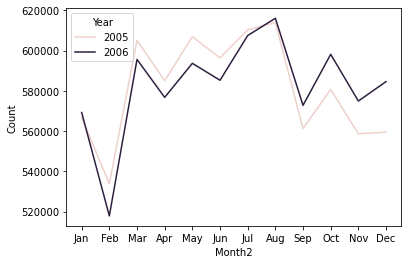

In [34]:
plot_ts_monthly = sns.lineplot(x = 'Month2', y = 'Count', 
                               hue = 'Year', data = test)

#### Monthly Count by States

In [35]:
# Creating a new column : Date
ts_monthly_state = summ_narm.copy()
ts_monthly_state = ts_monthly_state.rename(columns={'DayofMonth': 'Day'})

ts_monthly_state['Date'] = pd.to_datetime(ts_monthly_state[['Year','Month','Day']])

# then from the date we extract to year-month
ts_monthly_state['month_year'] = pd.to_datetime(ts_monthly_state['Date']).dt.to_period('M')

ts_monthly_state = ts_monthly_state[['month_year','Year', 'Month','state','Dest']].groupby(
    by = ['month_year','Year', 'Month', 'state'], 
    sort = True).size().reset_index(name = 'Count')
ts_monthly_state

,month_year,Year,Month,state,Count
0,2005-01,2005,1,AK,2986
1,2005-01,2005,1,AL,3732
2,2005-01,2005,1,AR,2892
3,2005-01,2005,1,AZ,15887
4,2005-01,2005,1,CA,66277
...,...,...,...,...,...
1226,2006-12,2006,12,VT,494
1227,2006-12,2006,12,WA,9943
1228,2006-12,2006,12,WI,3952
1229,2006-12,2006,12,WV,360


In [36]:
ts_monthly_state2 = ts_monthly_state.copy()
ts_monthly_state2['Month2'] = ts_monthly_state2['Month'].apply(month)
ts_monthly_state2

,month_year,Year,Month,state,Count,Month2
0,2005-01,2005,1,AK,2986,Jan
1,2005-01,2005,1,AL,3732,Jan
2,2005-01,2005,1,AR,2892,Jan
3,2005-01,2005,1,AZ,15887,Jan
4,2005-01,2005,1,CA,66277,Jan
...,...,...,...,...,...,...
1226,2006-12,2006,12,VT,494,Dec
1227,2006-12,2006,12,WA,9943,Dec
1228,2006-12,2006,12,WI,3952,Dec
1229,2006-12,2006,12,WV,360,Dec


In [37]:
ts_monthly_state.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   month_year  1231 non-null   period[M]
 1   Year        1231 non-null   int64    
 2   Month       1231 non-null   int64    
 3   state       1231 non-null   object   
 4   Count       1231 non-null   int64    
dtypes: int64(3), object(1), period[M](1)
memory usage: 48.2+ KB


Text(0.5, 1.0, 'Monthly Count (By State)')

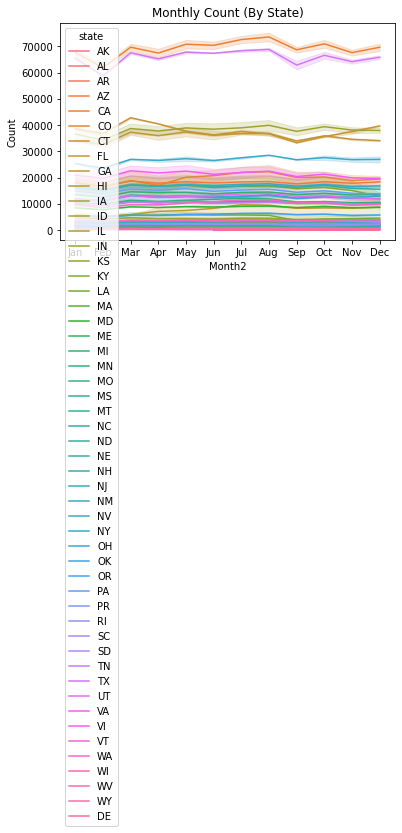

In [38]:
plot_ts_monthly_state = sns.lineplot(x = 'Month2', y = 'Count', 
                               hue = 'state', data = ts_monthly_state2)
plot_ts_monthly_state.set_title('Monthly Count (By State)')

### Testing
============================================================================================================================
Trying on a smaller dataset to obtain the count of the state by month.

In [39]:
# monthly = summ_narm.copy()
# monthly = monthly[monthly['state'] == 'WV']

In [40]:
# monthly.info()

In [41]:
# testing on monthly_WV
# Try for making date
# monthly_wv = monthly.copy()
# monthly_wv = monthly_wv.rename(columns={'DayofMonth': 'Day'})

# monthly_wv['Date'] = pd.to_datetime(monthly_wv[['Year','Month','Day']])

# then from the date we extract to year-month
# monthly_wv['month_year'] = pd.to_datetime(monthly_wv['Date']).dt.to_period('M')
# monthly_wv

In [42]:
# monthly_wv.info()

In [43]:
# monthly_wv = monthly_wv[['month_year','Year', 'Month','state']].groupby(by = ['month_year','Year', 'Month'], sort = True).size().reset_index(name = 'Count')
# monthly_wv

================================================================================================================
### End of Testing

## Year over Year. y-o-y
With the above visualisations, we can proceed to analyse the year over year (y-o-y) growth rates. 
First we derive the table where we compare the months in 2005 against 2006. Then we compare the total flights in year 2005 against 2006. 

Either functions: pivot or pivot_table works fine for python.

### 1) y-o-y (Month)

In [44]:
ts_monthly_state

,month_year,Year,Month,state,Count
0,2005-01,2005,1,AK,2986
1,2005-01,2005,1,AL,3732
2,2005-01,2005,1,AR,2892
3,2005-01,2005,1,AZ,15887
4,2005-01,2005,1,CA,66277
...,...,...,...,...,...
1226,2006-12,2006,12,VT,494
1227,2006-12,2006,12,WA,9943
1228,2006-12,2006,12,WI,3952
1229,2006-12,2006,12,WV,360


In [45]:
# I will save to the database for easy access
c.execute('''DROP TABLE q3yoy''')
forsql = ts_monthly_state[['Year', 'Month', 'state', 'Count']]

forsql.to_sql('q3yoy', con = conn , index = False)

In [46]:
ts_monthly_state = pd.read_sql_query("SELECT * FROM q3yoy", conn)

# creating a temporary column for date
ts_monthly_state['Date'] = pd.to_datetime(ts_monthly_state[['Year', 'Month']].assign(DAY=1))

# then from the date we extract to year-month
ts_monthly_state['month_year'] = pd.to_datetime(ts_monthly_state['Date']).dt.to_period('M')
ts_monthly_state = ts_monthly_state[['month_year', 'Year', 'Month', 'state', 'Count']]
ts_monthly_state

,month_year,Year,Month,state,Count
0,2005-01,2005,1,AK,2986
1,2005-01,2005,1,AL,3732
2,2005-01,2005,1,AR,2892
3,2005-01,2005,1,AZ,15887
4,2005-01,2005,1,CA,66277
...,...,...,...,...,...
1226,2006-12,2006,12,VT,494
1227,2006-12,2006,12,WA,9943
1228,2006-12,2006,12,WI,3952
1229,2006-12,2006,12,WV,360


In [47]:
test = ts_monthly_state.pivot(index = ['month_year', 'Year', 'Month'], columns = 'state', values = 'Count')
test

,,state,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
month_year,Year,Month,,,,,,,,,,,,,,,,,,,,,
2005-01,2005,1,2986.0,3732.0,2892.0,15887.0,66277.0,14755.0,2882.0,NaN,38373.0,34301.0,...,11006.0,66049.0,11723.0,23283.0,376.0,609.0,9554.0,3319.0,581.0,652.0
2005-02,2005,2,2730.0,3400.0,2748.0,14728.0,60922.0,13519.0,2932.0,NaN,37530.0,34091.0,...,10047.0,58585.0,12493.0,21819.0,346.0,601.0,8758.0,3090.0,469.0,631.0
2005-03,2005,3,3064.0,3826.0,3187.0,16589.0,68353.0,15341.0,3298.0,NaN,43089.0,38370.0,...,11353.0,67101.0,14286.0,24664.0,410.0,665.0,9942.0,3495.0,522.0,712.0
2005-04,2005,4,2997.0,3612.0,3109.0,15919.0,65813.0,13370.0,3264.0,NaN,40527.0,37664.0,...,11320.0,64726.0,13538.0,24032.0,396.0,698.0,9670.0,3406.0,521.0,523.0
2005-05,2005,5,3443.0,3732.0,3220.0,16500.0,69164.0,17774.0,3290.0,NaN,38148.0,39172.0,...,11596.0,67299.0,14001.0,24838.0,320.0,815.0,10145.0,3425.0,554.0,541.0
2005-06,2005,6,4327.0,3672.0,3114.0,16054.0,68968.0,18689.0,3182.0,NaN,36742.0,37861.0,...,10818.0,67343.0,14008.0,23363.0,318.0,795.0,10780.0,3409.0,506.0,787.0
2005-07,2005,7,4752.0,3674.0,3019.0,16342.0,71200.0,19887.0,3244.0,NaN,38272.0,37173.0,...,10777.0,67835.0,14665.0,24100.0,336.0,821.0,11529.0,3507.0,489.0,854.0
2005-08,2005,8,4628.0,3698.0,3106.0,16513.0,71928.0,19746.0,3273.0,NaN,37299.0,37644.0,...,10969.0,68241.0,14827.0,24352.0,296.0,841.0,11429.0,3563.0,460.0,855.0
2005-09,2005,9,3541.0,3273.0,2878.0,15654.0,67603.0,17976.0,3040.0,NaN,33326.0,34284.0,...,10316.0,61211.0,13840.0,21890.0,156.0,795.0,10505.0,3323.0,477.0,755.0


Using the above dataframe, we can find the year over year change of the states.

In [48]:
ts_month_yoy = test.pct_change(12)
ts_month_yoy = ts_month_yoy * 100
ts_month_yoy = ts_month_yoy.round(3)
ts_month_yoy

,,state,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
month_year,Year,Month,,,,,,,,,,,,,,,,,,,,,
2005-01,2005,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-02,2005,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-03,2005,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-04,2005,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-05,2005,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-06,2005,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-07,2005,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-08,2005,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09,2005,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2) y-o-y (Annual)
We want to compare the percentage change of 2006 compared to 2005.  

In [49]:
ts_monthly_ann = ts_monthly_state.groupby(by = ['Year', 'state'])['Count'].sum().reset_index()
ts_monthly_ann

,Year,state,Count
0,2005,AK,41724
1,2005,AL,42379
2,2005,AR,35755
3,2005,AZ,193224
4,2005,CA,814426
...,...,...,...
98,2006,VT,6680
99,2006,WA,122906
100,2006,WI,49720
101,2006,WV,4850


In [50]:
ts_monthly_ann = ts_monthly_ann.pivot(index = 'Year', columns = 'state', values = 'Count')
ts_monthly_ann

state,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,
2005,41724.0,42379.0,35755.0,193224.0,814426.0,204394.0,37516.0,NaN,456651.0,435549.0,...,128000.0,782172.0,162336.0,274041.0,3741.0,8731.0,122298.0,41757.0,6195.0,7918.0
2006,40653.0,36586.0,30561.0,241816.0,847087.0,265582.0,32337.0,336.0,449930.0,416972.0,...,121818.0,795245.0,144603.0,236368.0,3399.0,6680.0,122906.0,49720.0,4850.0,8120.0


In [51]:
ts_ann_yoy = ts_monthly_ann.pct_change()
ts_ann_yoy = ts_ann_yoy * 100
ts_ann_yoy = ts_ann_yoy.round(3).reset_index()
ts_ann_yoy

state,Year,AK,AL,AR,AZ,CA,CO,CT,DE,FL,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
0,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006,-2.567,-13.67,-14.527,25.148,4.01,29.936,-13.805,NaN,-1.472,...,-4.83,1.671,-10.924,-13.747,-9.142,-23.491,0.497,19.07,-21.711,2.551


In [52]:
# remove the first row because it is meaningless
ts_ann_yoy2 = ts_ann_yoy.iloc[[1,]]
ts_ann_yoy2

state,Year,AK,AL,AR,AZ,CA,CO,CT,DE,FL,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
1,2006,-2.567,-13.67,-14.527,25.148,4.01,29.936,-13.805,NaN,-1.472,...,-4.83,1.671,-10.924,-13.747,-9.142,-23.491,0.497,19.07,-21.711,2.551


In [53]:
test2 = pd.melt(ts_ann_yoy2, id_vars='Year')
test2

,Year,state,value
0,2006,AK,-2.567
1,2006,AL,-13.670
2,2006,AR,-14.527
3,2006,AZ,25.148
4,2006,CA,4.010
5,2006,CO,29.936
6,2006,CT,-13.805
7,2006,DE,NaN
8,2006,FL,-1.472
9,2006,GA,-4.265


In [54]:
test2['state'].nunique()

52

From the above, we have a total of 52 states which is consistent from the start. We now proceed to find which states have negative / positive growth rates

In [55]:
test2[test2['value'].isnull()]

,Year,state,value
7,2006,DE,NaN


#### State : DE
We observe that state : DE has NaN

In the following codes, we explore DE to find out why it returns NaN. We observe that DE only had flights in the year 2006-06 to 2006-12. Hence resulting in the NaN value. Despite that, we want to point out the the  

In [56]:
ts_month_yoy.loc[:,'DE']

month_year  Year  Month
2005-01     2005  1       NaN
2005-02     2005  2       NaN
2005-03     2005  3       NaN
2005-04     2005  4       NaN
2005-05     2005  5       NaN
2005-06     2005  6       NaN
2005-07     2005  7       NaN
2005-08     2005  8       NaN
2005-09     2005  9       NaN
2005-10     2005  10      NaN
2005-11     2005  11      NaN
2005-12     2005  12      NaN
2006-01     2006  1       NaN
2006-02     2006  2       NaN
2006-03     2006  3       NaN
2006-04     2006  4       NaN
2006-05     2006  5       NaN
2006-06     2006  6       NaN
2006-07     2006  7       NaN
2006-08     2006  8       NaN
2006-09     2006  9       NaN
2006-10     2006  10      NaN
2006-11     2006  11      NaN
2006-12     2006  12      NaN
Name: DE, dtype: float64

In [57]:
test.loc[:,'DE']

month_year  Year  Month
2005-01     2005  1         NaN
2005-02     2005  2         NaN
2005-03     2005  3         NaN
2005-04     2005  4         NaN
2005-05     2005  5         NaN
2005-06     2005  6         NaN
2005-07     2005  7         NaN
2005-08     2005  8         NaN
2005-09     2005  9         NaN
2005-10     2005  10        NaN
2005-11     2005  11        NaN
2005-12     2005  12        NaN
2006-01     2006  1         NaN
2006-02     2006  2         NaN
2006-03     2006  3         NaN
2006-04     2006  4         NaN
2006-05     2006  5         NaN
2006-06     2006  6         4.0
2006-07     2006  7        58.0
2006-08     2006  8        59.0
2006-09     2006  9        52.0
2006-10     2006  10       55.0
2006-11     2006  11       56.0
2006-12     2006  12       52.0
Name: DE, dtype: float64

# Part 2 : Negative Growth States

In [58]:
negative_annyoy =  test2[test2['value'] < 0]
negative_annyoy

,Year,state,value
0,2006,AK,-2.567
1,2006,AL,-13.670
2,2006,AR,-14.527
6,2006,CT,-13.805
8,2006,FL,-1.472
9,2006,GA,-4.265
12,2006,ID,-0.822
14,2006,IN,-18.370
16,2006,KY,-35.482
17,2006,LA,-10.282


In [59]:
# negative_annyoy.info()
nega_states = negative_annyoy['state'].unique()
nega_states

array(['AK', 'AL', 'AR', 'CT', 'FL', 'GA', 'ID', 'IN', 'KY', 'LA', 'ME',
       'MI', 'MN', 'MO', 'MT', 'NC', 'NH', 'NY', 'OH', 'PA', 'RI', 'SC',
       'TN', 'UT', 'VA', 'VI', 'VT', 'WV'], dtype=object)

In [60]:
negative_annyoy['state'].nunique()

28

Now that we have identified the 28 states with negative growth rate, we want to look at the months and compare their year over year percentage change.

Subsequently, we then plot the lines to show the y-o-y.

In [61]:
negmonyoy = ts_month_yoy.copy()
negmonyoy = negmonyoy.reset_index()
negmonyoy = negmonyoy.iloc[12:24,:]
negmonyoy

state,month_year,Year,Month,AK,AL,AR,AZ,CA,CO,CT,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
12,2006-01,2006,1,-3.952,-12.781,-6.189,28.369,4.385,44.405,-4.129,...,-9.867,-1.662,-0.486,-19.551,0.000,-7.389,0.534,24.194,-31.842,2.914
13,2006-02,2006,2,-4.725,-18.265,-14.192,25.306,2.899,46.342,-17.667,...,-10.670,0.633,-15.249,-18.713,-1.445,-11.481,-2.626,21.650,-24.094,-1.743
14,2006-03,2006,3,1.697,-13.461,-14.967,26.150,3.833,46.979,-15.343,...,-9.566,1.311,-14.574,-16.141,-7.317,-11.429,-3.742,17.797,-20.690,-1.264
15,2006-04,2006,4,1.168,-13.068,-15.600,25.378,4.947,56.290,-15.931,...,-12.465,1.438,-13.813,-18.346,-7.576,-24.499,0.352,17.851,-20.729,8.031
16,2006-05,2006,5,1.743,-15.247,-14.907,24.248,4.706,27.265,-17.386,...,-11.228,1.443,-14.292,-18.375,-11.875,-31.534,5.096,23.445,-19.134,11.645
17,2006-06,2006,6,-0.624,-23.638,-15.382,24.555,4.054,22.650,-15.745,...,-8.236,0.052,-11.922,-17.493,-14.465,-30.943,3.312,24.729,-15.810,-1.525
18,2006-07,2006,7,-5.177,-19.570,-14.839,25.542,3.820,21.753,-15.197,...,-5.150,1.426,-11.135,-17.643,-8.036,-26.066,1.353,23.496,-11.043,-0.234
19,2006-08,2006,8,-3.111,-18.253,-15.679,25.229,4.523,25.914,-14.940,...,-4.485,1.660,-11.209,-14.972,-10.135,-26.397,3.351,22.200,-5.870,-0.936
20,2006-09,2006,9,-3.671,-7.944,-18.416,25.821,3.167,23.921,-12.928,...,0.359,5.408,-13.403,-12.873,-4.487,-30.818,-1.428,24.075,-18.658,-4.371
21,2006-10,2006,10,-3.550,-6.084,-16.594,25.497,4.274,23.623,-12.743,...,4.472,3.988,-14.035,-8.076,-15.429,-24.737,-1.294,28.038,-30.172,5.458


In [62]:
negmonyoy_long = pd.melt(negmonyoy, id_vars=['month_year', 'Year', 'Month'])
negmonyoy_long

,month_year,Year,Month,state,value
0,2006-01,2006,1,AK,-3.952
1,2006-02,2006,2,AK,-4.725
2,2006-03,2006,3,AK,1.697
3,2006-04,2006,4,AK,1.168
4,2006-05,2006,5,AK,1.743
...,...,...,...,...,...
619,2006-08,2006,8,WY,-0.936
620,2006-09,2006,9,WY,-4.371
621,2006-10,2006,10,WY,5.458
622,2006-11,2006,11,WY,12.305


In [63]:
# filtering out the negative y-o-y states
negmonyoy_long = negmonyoy_long[negmonyoy_long['state'].isin(nega_states)]
negmonyoy_long

,month_year,Year,Month,state,value
0,2006-01,2006,1,AK,-3.952
1,2006-02,2006,2,AK,-4.725
2,2006-03,2006,3,AK,1.697
3,2006-04,2006,4,AK,1.168
4,2006-05,2006,5,AK,1.743
...,...,...,...,...,...
607,2006-08,2006,8,WV,-5.870
608,2006-09,2006,9,WV,-18.658
609,2006-10,2006,10,WV,-30.172
610,2006-11,2006,11,WV,-30.755


In [64]:
# to confirm that the states are the same
check = negmonyoy_long['state'].unique()

np.array_equal(check, nega_states)

True

In [65]:
# from long to wide
negmonyoy_wide = negmonyoy_long.copy()
negmonyoy_wide = negmonyoy_wide.pivot(index = ['month_year','Year','Month'], columns = 'state', values = 'value').reset_index()
negmonyoy_wide

state,month_year,Year,Month,AK,AL,AR,CT,FL,GA,ID,...,OH,PA,RI,SC,TN,UT,VA,VI,VT,WV
0,2006-01,2006,1,-3.952,-12.781,-6.189,-4.129,1.324,-0.539,10.665,...,-5.686,-14.718,-8.738,-21.895,-9.867,-0.486,-19.551,0.000,-7.389,-31.842
1,2006-02,2006,2,-4.725,-18.265,-14.192,-17.667,-3.613,-8.518,0.100,...,-9.314,-14.933,-18.004,-13.906,-10.670,-15.249,-18.713,-1.445,-11.481,-24.094
2,2006-03,2006,3,1.697,-13.461,-14.967,-15.343,-1.225,-5.293,-3.919,...,-8.042,-12.286,-12.644,-15.527,-9.566,-14.574,-16.141,-7.317,-11.429,-20.690
3,2006-04,2006,4,1.168,-13.068,-15.600,-15.931,-0.052,-8.626,-5.508,...,-6.299,-13.218,-18.009,-16.155,-12.465,-13.813,-18.346,-7.576,-24.499,-20.729
4,2006-05,2006,5,1.743,-15.247,-14.907,-17.386,-2.262,-8.795,-2.606,...,-5.393,-16.219,-19.065,-12.977,-11.228,-14.292,-18.375,-11.875,-31.534,-19.134
5,2006-06,2006,6,-0.624,-23.638,-15.382,-15.745,-2.711,-8.764,-1.149,...,-7.617,-16.120,-19.787,-11.814,-8.236,-11.922,-17.493,-14.465,-30.943,-15.810
6,2006-07,2006,7,-5.177,-19.570,-14.839,-15.197,-3.501,-2.053,-0.976,...,-5.736,-10.711,-18.627,-9.884,-5.150,-11.135,-17.643,-8.036,-26.066,-11.043
7,2006-08,2006,8,-3.111,-18.253,-15.679,-14.940,-3.148,-4.264,0.155,...,-4.354,-10.520,-18.587,-11.052,-4.485,-11.209,-14.972,-10.135,-26.397,-5.870
8,2006-09,2006,9,-3.671,-7.944,-18.416,-12.928,-0.120,-1.537,-4.163,...,-5.462,-7.579,-15.330,-5.042,0.359,-13.403,-12.873,-4.487,-30.818,-18.658
9,2006-10,2006,10,-3.550,-6.084,-16.594,-12.743,1.125,-1.545,-1.549,...,-0.125,-6.895,-11.728,-2.605,4.472,-14.035,-8.076,-15.429,-24.737,-30.172


### Negative State Plots

In [66]:
negmonyoy_long['Month2'] = negmonyoy_long['Month'].apply(month)
negmonyoy_long

C:\Users\geral\AppData\Local\Temp/ipykernel_16232/3326626807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negmonyoy_long['Month2'] = negmonyoy_long['Month'].apply(month)


,month_year,Year,Month,state,value,Month2
0,2006-01,2006,1,AK,-3.952,Jan
1,2006-02,2006,2,AK,-4.725,Feb
2,2006-03,2006,3,AK,1.697,Mar
3,2006-04,2006,4,AK,1.168,Apr
4,2006-05,2006,5,AK,1.743,May
...,...,...,...,...,...,...
607,2006-08,2006,8,WV,-5.870,Aug
608,2006-09,2006,9,WV,-18.658,Sep
609,2006-10,2006,10,WV,-30.172,Oct
610,2006-11,2006,11,WV,-30.755,Nov


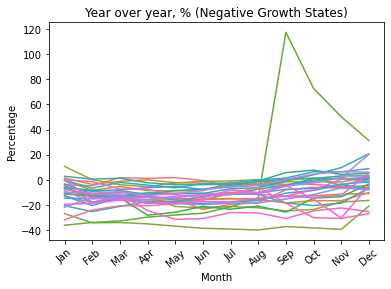

In [67]:
plot_negmonyoy = sns.lineplot(x = 'Month2', y = 'value', 
                               hue = 'state', data = negmonyoy_long)
plot_negmonyoy.set_title('Year over year, % (Negative Growth States)')
plot_negmonyoy.tick_params(axis='x', rotation=40)
plot_negmonyoy.set_xlabel("Month")
plot_negmonyoy.set_ylabel("Percentage")
plot_negmonyoy.legend([],[], frameon=False)

# Part 3: Positive Growth States

In [68]:
positive_annyoy =  test2[-test2['value'] < 0]

positive_annyoy

,Year,state,value
3,2006,AZ,25.148
4,2006,CA,4.010
5,2006,CO,29.936
10,2006,HI,70.211
11,2006,IA,20.815
13,2006,IL,9.830
15,2006,KS,14.602
18,2006,MA,3.174
19,2006,MD,0.998
24,2006,MS,3.490


In [69]:
# positive_annyoy.info()
pos_states = positive_annyoy['state'].unique()
pos_states

array(['AZ', 'CA', 'CO', 'HI', 'IA', 'IL', 'KS', 'MA', 'MD', 'MS', 'ND',
       'NE', 'NJ', 'NM', 'NV', 'OK', 'OR', 'PR', 'SD', 'TX', 'WA', 'WI',
       'WY'], dtype=object)

In [70]:
positive_annyoy['state'].nunique()

23

In [71]:
posmonyoy = ts_month_yoy.copy()
posmonyoy = posmonyoy.reset_index()
posmonyoy = posmonyoy.iloc[12:24,:]
posmonyoy

state,month_year,Year,Month,AK,AL,AR,AZ,CA,CO,CT,...,TN,TX,UT,VA,VI,VT,WA,WI,WV,WY
12,2006-01,2006,1,-3.952,-12.781,-6.189,28.369,4.385,44.405,-4.129,...,-9.867,-1.662,-0.486,-19.551,0.000,-7.389,0.534,24.194,-31.842,2.914
13,2006-02,2006,2,-4.725,-18.265,-14.192,25.306,2.899,46.342,-17.667,...,-10.670,0.633,-15.249,-18.713,-1.445,-11.481,-2.626,21.650,-24.094,-1.743
14,2006-03,2006,3,1.697,-13.461,-14.967,26.150,3.833,46.979,-15.343,...,-9.566,1.311,-14.574,-16.141,-7.317,-11.429,-3.742,17.797,-20.690,-1.264
15,2006-04,2006,4,1.168,-13.068,-15.600,25.378,4.947,56.290,-15.931,...,-12.465,1.438,-13.813,-18.346,-7.576,-24.499,0.352,17.851,-20.729,8.031
16,2006-05,2006,5,1.743,-15.247,-14.907,24.248,4.706,27.265,-17.386,...,-11.228,1.443,-14.292,-18.375,-11.875,-31.534,5.096,23.445,-19.134,11.645
17,2006-06,2006,6,-0.624,-23.638,-15.382,24.555,4.054,22.650,-15.745,...,-8.236,0.052,-11.922,-17.493,-14.465,-30.943,3.312,24.729,-15.810,-1.525
18,2006-07,2006,7,-5.177,-19.570,-14.839,25.542,3.820,21.753,-15.197,...,-5.150,1.426,-11.135,-17.643,-8.036,-26.066,1.353,23.496,-11.043,-0.234
19,2006-08,2006,8,-3.111,-18.253,-15.679,25.229,4.523,25.914,-14.940,...,-4.485,1.660,-11.209,-14.972,-10.135,-26.397,3.351,22.200,-5.870,-0.936
20,2006-09,2006,9,-3.671,-7.944,-18.416,25.821,3.167,23.921,-12.928,...,0.359,5.408,-13.403,-12.873,-4.487,-30.818,-1.428,24.075,-18.658,-4.371
21,2006-10,2006,10,-3.550,-6.084,-16.594,25.497,4.274,23.623,-12.743,...,4.472,3.988,-14.035,-8.076,-15.429,-24.737,-1.294,28.038,-30.172,5.458


In [72]:
posmonyoy_long = pd.melt(posmonyoy, id_vars=['month_year', 'Year', 'Month'])
posmonyoy_long

,month_year,Year,Month,state,value
0,2006-01,2006,1,AK,-3.952
1,2006-02,2006,2,AK,-4.725
2,2006-03,2006,3,AK,1.697
3,2006-04,2006,4,AK,1.168
4,2006-05,2006,5,AK,1.743
...,...,...,...,...,...
619,2006-08,2006,8,WY,-0.936
620,2006-09,2006,9,WY,-4.371
621,2006-10,2006,10,WY,5.458
622,2006-11,2006,11,WY,12.305


In [73]:
# filtering out the positive y-o-y states
posmonyoy_long = posmonyoy_long[posmonyoy_long['state'].isin(pos_states)]
posmonyoy_long

,month_year,Year,Month,state,value
36,2006-01,2006,1,AZ,28.369
37,2006-02,2006,2,AZ,25.306
38,2006-03,2006,3,AZ,26.150
39,2006-04,2006,4,AZ,25.378
40,2006-05,2006,5,AZ,24.248
...,...,...,...,...,...
619,2006-08,2006,8,WY,-0.936
620,2006-09,2006,9,WY,-4.371
621,2006-10,2006,10,WY,5.458
622,2006-11,2006,11,WY,12.305


In [74]:
# to confirm that the states are the same
check = posmonyoy_long['state'].unique()

np.array_equal(check, pos_states)

True

In [75]:
# from long to wide
posmonyoy_wide = posmonyoy_long.copy()
posmonyoy_wide = posmonyoy_wide.pivot(index = ['month_year','Year','Month'], columns = 'state', values = 'value').reset_index()
posmonyoy_wide

state,month_year,Year,Month,AZ,CA,CO,HI,IA,IL,KS,...,NM,NV,OK,OR,PR,SD,TX,WA,WI,WY
0,2006-01,2006,1,28.369,4.385,44.405,5.451,21.702,16.569,25.802,...,1.834,9.786,5.538,11.506,-1.541,50.649,-1.662,0.534,24.194,2.914
1,2006-02,2006,2,25.306,2.899,46.342,4.197,24.328,11.711,-3.804,...,6.740,5.787,-1.027,5.496,-5.420,39.347,0.633,-2.626,21.650,-1.743
2,2006-03,2006,3,26.150,3.833,46.979,5.558,30.356,10.325,-2.448,...,6.925,7.902,2.888,0.999,-2.067,17.536,1.311,-3.742,17.797,-1.264
3,2006-04,2006,4,25.378,4.947,56.290,55.116,33.212,10.089,-1.749,...,7.309,8.550,1.254,8.289,2.408,16.519,1.438,0.352,17.851,8.031
4,2006-05,2006,5,24.248,4.706,27.265,60.852,39.515,10.363,-0.760,...,4.412,8.435,2.331,6.219,6.377,15.865,1.443,5.096,23.445,11.645
5,2006-06,2006,6,24.555,4.054,22.650,74.926,16.346,12.254,5.804,...,0.000,7.964,1.987,8.514,8.522,38.289,0.052,3.312,24.729,-1.525
6,2006-07,2006,7,25.542,3.820,21.753,104.840,8.665,11.679,32.034,...,-0.461,8.001,3.255,6.545,4.777,26.623,1.426,1.353,23.496,-0.234
7,2006-08,2006,8,25.229,4.523,25.914,103.760,11.143,10.586,38.261,...,-0.244,8.511,1.863,7.231,6.872,49.649,1.660,3.351,22.200,-0.936
8,2006-09,2006,9,25.821,3.167,23.921,107.266,14.474,8.311,35.286,...,-6.549,7.911,0.000,6.545,6.713,29.134,5.408,-1.428,24.075,-4.371
9,2006-10,2006,10,25.497,4.274,23.623,105.238,17.668,6.326,34.831,...,-6.453,7.604,-1.421,6.033,3.440,14.198,3.988,-1.294,28.038,5.458


## Positive States Plot

In [76]:
posmonyoy_long['Month2'] = posmonyoy_long['Month'].apply(month)
posmonyoy_long

C:\Users\geral\AppData\Local\Temp/ipykernel_16232/1319817841.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  posmonyoy_long['Month2'] = posmonyoy_long['Month'].apply(month)


,month_year,Year,Month,state,value,Month2
36,2006-01,2006,1,AZ,28.369,Jan
37,2006-02,2006,2,AZ,25.306,Feb
38,2006-03,2006,3,AZ,26.150,Mar
39,2006-04,2006,4,AZ,25.378,Apr
40,2006-05,2006,5,AZ,24.248,May
...,...,...,...,...,...,...
619,2006-08,2006,8,WY,-0.936,Aug
620,2006-09,2006,9,WY,-4.371,Sep
621,2006-10,2006,10,WY,5.458,Oct
622,2006-11,2006,11,WY,12.305,Nov


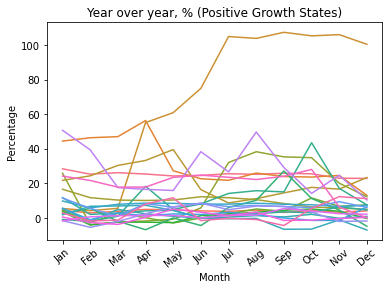

In [77]:
plot_posmonyoy = sns.lineplot(x = 'Month2', y = 'value', 
                               hue = 'state', data = posmonyoy_long)
plot_posmonyoy.set_title('Year over year, % (Positive Growth States)')
plot_posmonyoy.tick_params(axis='x', rotation=40)
plot_posmonyoy.set_xlabel("Month")
plot_posmonyoy.set_ylabel("Percentage")
plot_posmonyoy.legend([],[], frameon=False)

To conclude, we can say that over the period of 2005 and 2006. 23 states saw an increase in the number of flights while 28 states saw a decrease. With one exception, DE (Delaware). 

## Disconnecting from the database

In [78]:
conn.close()